# Model Classification Tutorial

In this tutorial we will start with very simple exercises to classify models by hand and then implement numerical solvers for each of the models. Then we will develop more complex fundamental concepts of benchmarking and formal data analysis to expand your practical toolbox for numerical modeling.

## Exercise 1: Model classification and solver implementation

### 1.a)
Classify the following models according to the criteria discussed in the lecture (static vs. dynamic, linear vs. nonlinear, coupled vs. uncoupled, symmetric vs. asymmetric):

#### Model 1: Independent Resistors in a Circuit

$$ I_1 = V_1 / R_1 $$
$$ I_2 = V_2 / R_2 $$

#### Model 2: Heat Sources

$$ T_1 + T_2 = 100 $$
$$ T_1 = T_2 $$

#### Model 3: Coupled Linear Truss Forces

$$ 8 \times 10^5 u_1 - 2 \times 10^5 u_2 = 0 $$
$$ -2 \times 10^5 u_1 + 4 \times 10^5 u_2 = 500 $$

####  Model 4: Non-Linear Diode Circuit

$$ I_1 = I_s (\exp(V_1 / V_t) - 1) $$
$$ I_2 = I_s (\exp(V_2 / V_t) - 1) $$

#### Model 5: Exponential Decay of Satellite Altitude

$$ \frac{dh}{dt} = -k h $$

#### Model 6: Simple Harmonic Oscillator (Satellite Tether)

$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = -\omega^2 x $$

#### Model 7: Duffing Oscillator (Non-Linear Vibration in Space Structure)

$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = -\delta v - \alpha x - \beta x^3 $$

#### Model 8: Two masses connected by springs with damping

$$ \frac{dx_1}{dt} = v_1 $$
$$ \frac{dv_1}{dt} = -k_1 x_1 + k_2 (x_2 - x_1) - d_1 v_1 $$
$$ \frac{dx_2}{dt} = v_2 $$
$$ \frac{dv_2}{dt} = -k_3 x_2 - k_2 (x_2 - x_1) - d_2 v_2 $$

#### Model 9: Potential Energy Minimization (Orbital Configuration)

$$ F_1 = 2 x_1 + \sin(x_1 + x_2) = 0 $$
$$ F_2 = 2 x_2 + \sin(x_1 + x_2) = 0 $$


#### Model 10: Heat Balance on CubeSat Faces


$$ q_{in,1} =  \epsilon \sigma A (T_1^4 - T_{space}^4) + G (T_1 - T_2)  $$
$$ q_{in,2} = \epsilon \sigma A (T_2^4 - T_{space}^4) + G (T_2 - T_1)  $$

#### Model 11: Hill-Clohessy-Wiltshire Equations (Relative Orbit)

$$ \frac{d^2 x}{dt^2} = 3n^2 x + 2n \frac{dy}{dt} $$
$$ \frac{d^2 y}{dt^2} = -2n \frac{dx}{dt} $$
$$ \frac{d^2 z}{dt^2} = -n^2 z $$

#### Model 12: Logistic Growth Model

$$ \frac{dP}{dt} = r P (1 - P / K) $$


### 1.b) Using numerical solvers



Next we will implement appropriate numerical solvers for each of the models above. The table below summarizes appropriated solver choices based on model classification. Adapt the code below in each cell by writing the model in the respective standard form that can be solved by the solver.

| Static (Algebraic Solvers) | | | | | Dynamic (Time Integration) | | | |
|---------------------------|-|-|-|-|---------------------------|-|-|-|
| **Linear** | | **Non-Linear** | | | **Linear** | | **Non-Linear** | |
| **Uncoupled** | **Coupled** | **Uncoupled** | **Coupled** | | **Uncoupled** | **Coupled** | **Uncoupled** | **Coupled** |
| **Recommended Solver(s):**<br>`scipy.linalg.solve`<br><br>**Notes:**<br>For scalar equations ($x_i = b_i/a_i$), solve directly (e.g., `x = b/a`) to avoid matrix overhead.<br>For multiple uncoupled equations, use `scipy.linalg.solve` independently.<br>Symmetric case: No matrix for scalar, so symmetry irrelevant unless variables constrained (e.g., $x_1 = x_2$). | **Recommended Solver(s):**<br>`scipy.linalg.solve` (or `scipy.linalg.cholesky` for symmetric positive definite)<br><br>**Notes:**<br>Solve $\mathbf{Ax} = \mathbf{b}$. For scalar case (1x1), use `x = b/a`.<br>Use `assume_a='sym'` for symmetric matrices to improve efficiency/stability. | **Recommended Solver(s):**<br>`scipy.optimize.fsolve`<br><br>**Notes:**<br>For scalar equations ($f(x_i) = 0$), `fsolve` is efficient for root-finding.<br>Multiple uncoupled equations: solve each independently.<br>Symmetric case: May reduce variables if $x_1 = x_2$. | **Recommended Solver(s):**<br>`scipy.optimize.fsolve` or `scipy.optimize.root`<br><br>**Notes:**<br>Solve $\mathbf{f}(\mathbf{x}) = \mathbf{0}$. Scalar case: Use `fsolve` directly.<br>Provide Jacobian for speed in coupled systems.<br>Symmetric case: Exploit to reduce DOF or constrain solutions. | | **Recommended Solver(s):**<br>`scipy.integrate.solve_ivp`<br><br>**Notes:**<br>Scalar linear ODE ($\dot{y} = ay$): Use 'RK45' for non-stiff, for stiff use `LSODA` or similar.<br>Symmetric case: Rare, conserved quantities may arise. | **Recommended Solver(s):**<br>`scipy.integrate.solve_ivp` or `scipy.linalg.expm`<br><br>**Notes:**<br>LTI systems ($\dot{\mathbf{y}} = \mathbf{Ay}$). Scalar case: Solve directly as above.<br>Use matrix exponential for analytical solutions or integrate numerically.<br>Symmetric case: Modal analysis via `scipy.linalg.eig`. | **Recommended Solver(s):**<br>`scipy.integrate.solve_ivp`<br><br>**Notes:**<br>Scalar non-linear ODE ($\dot{y} = f(y)$): Use 'BDF' for stiff problems.<br>Analytical solutions (e.g., separable) may be faster if available.<br>Symmetric case: Symmetry may imply conserved quantities. | **Recommended Solver(s):**<br>`scipy.integrate.solve_ivp`<br><br>**Notes:**<br>Non-linear ODE system ($\dot{\mathbf{y}} = \mathbf{f}(\mathbf{y})$). Scalar case: Treat as uncoupled non-linear.<br>Provide Jacobian for efficiency.<br>Symmetric case: Exploit for reduced DOF or validation. |


In [1]:
import numpy as np
import scipy as sp

In [2]:
# Model 1
# Solve for $ I_1 $ and $ I_2 $
V_1 = 10  # V
V_2 = 20  # V
R_1 = 5   # Ohm
R_2 = 10  # Ohm
# Computerized model:
# I_1 = V_1 / R_1 #
# I_2 = V_2 / R_2 #

In [3]:
# Model 2
# Solve for $T_1$ and $T_2$
T_total = 100  # Total temperature constraint

# Computerized model:
# T_1 + T_2 = 100
# T_1 - T_2 = 0

In [4]:
# Model 3
# Solve for $u_1$ and $u_2$
k_11 = 8e5  # Stiffness coefficient
k_12 = -2e5  # Stiffness coefficient
k_21 = -2e5  # Stiffness coefficient
k_22 = 4e5   # Stiffness coefficient
f_2 = 500    # Applied force

# Computerized model:
# k_11 * u_1 + k_12 * u_2 = 0
# k_21 * u_1 + k_22 * u_2 = f_2

In [5]:
# Model 4
# Solve for $I_1$ and $I_2$
# Equations:
I_s = 1e-12  # Saturation current (A)
V_t = 0.025  # Thermal voltage (V)
V_1 = 0.7    # Voltage (V)
V_2 = 0.6    # Voltage (V)

# Computerized model:
# I_1 - I_s * (exp(V_1 / V_t) - 1) = 0
# I_2 - I_s * (exp(V_2 / V_t) - 1) = 0

In [6]:
# Model 5
# Solve for $h(t)$
# Equation:
# $\frac{dh}{dt} = -k h$
# Initial condition: $h(0) = h_0$
k = 0.1    # Decay rate (1/year)
h_0 = 400  # Initial altitude (km)

# Computerized model:
# dh_dt = -k * h
# h(0) = h_0

In [7]:
# Model 6
# Solve for $x(t)$ and $v(t)$
# Equations:
# $\frac{dx}{dt} = v$
# $\frac{dv}{dt} = -\omega^2 x$
# Initial conditions: $x(0) = 1$, $v(0) = 0$
omega = 2  # Angular frequency (rad/s)
x_0 = 1    # Initial displacement
v_0 = 0    # Initial velocity

# Computerized model:
# dx_dt = v
# dv_dt = -omega**2 * x
# x(0) = x_0
# v(0) = v_0

In [8]:
# Model 7
# Solve for $x(t)$ and $v(t)$
# Equations:
# $\frac{dx}{dt} = v$
# $\frac{dv}{dt} = -\delta v - \alpha x - \beta x^3$
# Initial conditions: $x(0) = 1$, $v(0) = 0$
delta = 0.3  # Damping coefficient
alpha = 1    # Linear stiffness
beta = 5     # Non-linear stiffness
x_0 = 1      # Initial displacement
v_0 = 0      # Initial velocity

# Computerized model:
# dx_dt = v
# dv_dt = -delta * v - alpha * x - beta * x**3
# x(0) = x_0
# v(0) = v_0

In [9]:
# Model 8
# Solve for $x_1(t)$, $v_1(t)$, $x_2(t)$, $v_2(t)$
# Equations:
# $\frac{dx_1}{dt} = v_1$
# $\frac{dv_1}{dt} = -k_1 x_1 + k_2 (x_2 - x_1) - d_1 v_1$
# $\frac{dx_2}{dt} = v_2$
# $\frac{dv_2}{dt} = -k_3 x_2 - k_2 (x_2 - x_1) - d_2 v_2$
# Initial conditions: $x_1(0)=1$, $v_1(0)=0$, $x_2(0)=0$, $v_2(0)=0$
k_1 = 1    # Spring constant 1
k_2 = 2    # Spring constant 2 (coupling)
k_3 = 1    # Spring constant 3
d_1 = 0.1  # Damping coefficient 1
d_2 = 0.2  # Damping coefficient 2
x1_0 = 1   # Initial displacement 1
v1_0 = 0   # Initial velocity 1
x2_0 = 0   # Initial displacement 2
v2_0 = 0   # Initial velocity 2

# Computerized model:
# dx1_dt = v_1
# dv1_dt = -k_1 * x_1 + k_2 * (x_2 - x_1) - d_1 * v_1
# dx2_dt = v_2
# dv2_dt = -k_3 * x_2 - k_2 * (x_2 - x_1) - d_2 * v_2
# x_1(0) = x1_0
# v_1(0) = v1_0
# x_2(0) = x2_0
# v_2(0) = v2_0

In [10]:
# Model 9
# Solve for $x_1$ and $x_2$

# Initial guess: [1, 1]
x1_guess = 1  # Initial guess for x_1
x2_guess = 1  # Initial guess for x_2

# Computerized model:
# F_1 = 2 * x_1 + sin(x_1 + x_2)
# F_2 = 2 * x_2 + sin(x_1 + x_2)

In [11]:
# Model 10
# Solve for $T_1$ and $T_2$
q_in1 = 100   # Input heat flux 1 (W)
q_in2 = 80    # Input heat flux 2 (W)
epsilon = 0.8 # Emissivity
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2/K^4)
A = 0.1       # Area (m^2)
T_space = 3   # Space temperature (K)
G = 10        # Conductance (W/K)
T1_guess = 300  # Initial guess for T_1 (K)
T2_guess = 300  # Initial guess for T_2 (K)

# Computerized model:
# q_in1 = epsilon * sigma * A * (T_1**4 - T_space**4) - G * (T_1 - T_2)
# q_in2 = epsilon * sigma * A * (T_2**4 - T_space**4) - G * (T_2 - T_1)

In [12]:
# Model 11
# Solve for $x(t)$, $\dot{x}(t)$, $y(t)$, $\dot{y}(t)$, $z(t)$, $\dot{z}(t)$
n = 0.001   # Orbital rate (rad/s)
x_0 = 0     # Initial x position (m)
vx_0 = 1    # Initial x velocity (m/s)
y_0 = 100   # Initial y position (m)
vy_0 = 1    # Initial y velocity (m/s)
z_0 = 0     # Initial z position (m)
vz_0 = 1    # Initial z velocity (m/s)

# Computerized model:
# dx_dt = vx
# dvx_dt = 3 * n**2 * x + 2 * n * vy
# dy_dt = vy
# dvy_dt = -2 * n * vx
# dz_dt = vz
# dvz_dt = -n**2 * z
# x(0) = x_0, vx(0) = vx_0, y(0) = y_0, vy(0) = vy_0, z(0) = z_0, vz(0) = vz_0

In [13]:
# Model 12
# Solve for $P(t)$
# Initial condition: $P(0) = P_0$
r = 0.1    # Growth rate (1/year)
K = 1000   # Carrying capacity
P_0 = 100  # Initial population

# Computerized model:
# dP_dt = r * P * (1 - P / K)
# P(0) = P_0

## Exercise 2: Benchmarking numerical solvers

### 2.a) Introductory scalar problem example

In this exercise we will focus on important practical aspects of numerical solvers, including benchmarking and performance evaluation. For example, consider solving a scalar equation like:

$$ x^3 - 2x - 5 = 0 $$

Using different root-finding methods available in `scipy.optimize`, such as `fsolve`, `newton`, and `brentq` which in general are wrapped in the `scipy.optimize.root_scalar`. We will compare their performance in terms of speed, accuracy, and robustness.

You will learn a lot more about the detail of these methods in later lectures. This exercise is focussed on motivating why it's useful to understand the differences of these methods to begin with. For example certain solvers will be faster or more accurate for your problem. For this purpose the skill of benchmarking is useful to have in your toolbox.

First, let's set up our benchmarking environment. Start by defining the function, additionally we add as much _structure_ as we can since these might be useful for some methods to improve speed and accuracy. Additionally we add the analytical solution and initial guess/bracket values.

In [14]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Define the function and its derivatives
def f(x):
    return x**3 - 2*x - 5  # Solution is approximately 2.0945514815423265

def f_prime(x):
    """First derivative of f(x) for Newton and Halley methods."""
    return 3*x**2 - 2

def f_double_prime(x):
    """Second derivative of f(x) for Halley method."""
    return 6*x

# Analytical solution
x_star = 2.0945514815423265

# Initial guess and bracket
x0 = 2.0
a, b = 2, 3


In real world problems analytical solutions and good guess values are not always known, but you can generally derive some appropriate toy problem similar to the real problem that you want to benchmark. Next we define functions for each root-finding method to be benchmarked. Note that we have to read the documentation to understand which methods we need for each solver, then we capture all our methods in a dictionary for easy iteration:

In [15]:
# Define root-finding methods as named functions
def solve_fsolve():
    return sp.optimize.fsolve(f, x0)[0]

def solve_newton():
    return sp.optimize.root_scalar(f, method='newton', x0=x0, fprime=f_prime).root

def solve_secant():
    return sp.optimize.root_scalar(f, method='secant', x0=x0).root

def solve_halley():
    return sp.optimize.root_scalar(f, method='halley', x0=x0, fprime=f_prime, fprime2=f_double_prime).root

def solve_brentq():
    return sp.optimize.root_scalar(f, method='brentq', bracket=[a, b]).root

def solve_bisect():
    return sp.optimize.root_scalar(f, method='bisect', bracket=[a, b]).root

def solve_ridder():
    return sp.optimize.root_scalar(f, method='ridder', bracket=[a, b]).root

def solve_toms748():
    return sp.optimize.root_scalar(f, method='toms748', bracket=[a, b]).root

# Dictionary of methods to benchmark
methods = {
    'fsolve': solve_fsolve,
    'newton': solve_newton,
    'secant': solve_secant,
    'halley': solve_halley,
    'brentq': solve_brentq,
    'bisect': solve_bisect,
    'ridder': solve_ridder,
    'toms748': solve_toms748
}



Note that you can easily add new methods to the benchmark later by simply defining a new function and adding it to the `methods` dictionary e.g. `methods['my_method'] = my_method_function`. Since we want to run the benchmarks multiple times, it's good to wrap our routine and data analysis in a function like we have below:

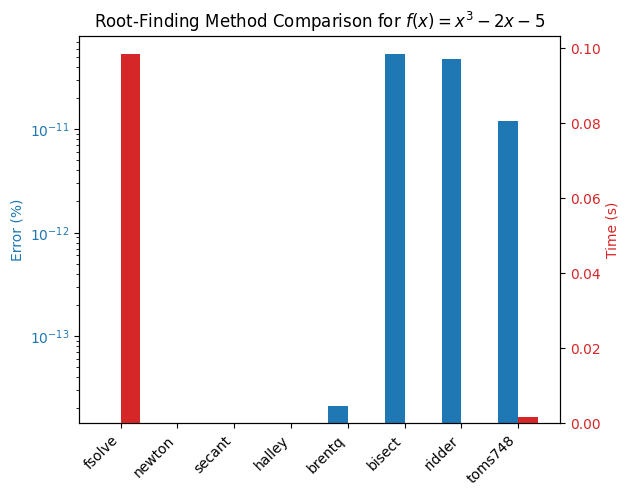

In [16]:
# Benchmarking
def run_benchmarks(methods, x_star):
    results = {}
    for name, method in methods.items():
        start_time = time.time()
        root = method()
        elapsed_time = time.time() - start_time
        # Calculate percentage error
        error_percent = abs((root - x_star) / x_star) * 100
        results[name] = (error_percent, elapsed_time)
    return results

# Plot results using a bar chart
def plot_results(results):
    import matplotlib.pyplot as plt
    import numpy as np
    labels = list(results.keys())
    errors = [results[name][0] for name in labels]
    times = [results[name][1] for name in labels]
    x = np.arange(len(labels))
    width = 0.35

    fig, ax1 = plt.subplots()
    bars1 = ax1.bar(x - width/2, errors, width, label='Error', color='tab:blue')
    ax1.set_ylabel('Error (%)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_yscale('log')  # Log scale for error due to small values

    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + width/2, times, width, label='Time', color='tab:red')
    ax2.set_ylabel('Time (s)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=45, ha='right')
    fig.tight_layout()
    plt.title('Root-Finding Method Comparison for $f(x) = x^3 - 2x - 5$')
    plt.show()

results = run_benchmarks(methods, x_star)
plot_results(results)


It is immediately apparent that `brentq` and `ridder` are some of the faster methods for solving this problem (results may vary depending on back-end build and hardware) while `fsolve` and the `newton` family of methods give exact results. Suppose that for your application you don't require such a very high accuracy, then you might choose `brentq` or `ridder` as your method of choice. The solver speed can be improved further by lowering the tolerance settings, to start with add a new method using a tolerance `xtol=1e-6` for `brentq` and `ridder` to the `method dictionary and rerun the benchmark.

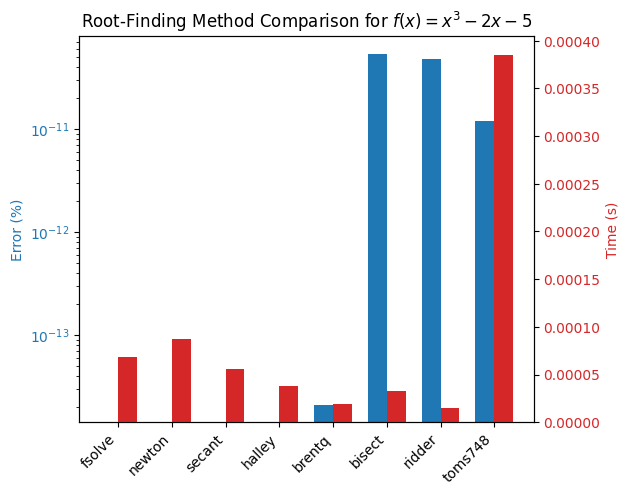

In [17]:
# Define new methods with modified tolerances e.g.:
def solve_brentq_tol():
    pass # Implement method with xtol=1e-6

# New methods with modified tolerances like
# method['brentq xtol=1e-6'] = solve_brentq_tol

# Rerun benchmarks:
results = run_benchmarks(methods, x_star)
plot_results(results)


Comment on the findings and play around with different tolerances and initial guesses/brackets to see how the performance changes.

### 2.c) Linearity

Lineary is one of the most import properties defining models that can greatly ease analysis and our choice of numerical solvers. In this exercise we will explore the impact of linearity on solver performance using a simple electrical circuit example.

Consider ladder circuit networks which are common in electrical engineering, representing filters, transmission lines, or sensor arrays. It consists of series and shunt resistors in a chain, with voltage sources. For $ n $ sections, there are $ n $ meshes (loops), yielding $ n $ linear equations for mesh currents $ I_1, I_2, \dots, I_n $. Each section has a series resistor $ R_s $ (e.g., 10 Ω) and a shunt resistor $ R_p $ (e.g., 20 Ω). A voltage source $ V $ (e.g., 10 V) at the input. Grounded at the end. For $ n = 3 $ meshes: Loops share resistors, leading to coupled equations. We can vary $ n = 3 $ to $ 9 $ to change system size. The equations can be derived from Kirchhoff's Voltage Law (KVL) per mesh. The system is $ \mathbf{A} \mathbf{I} = \mathbf{V} $, where $ \mathbf{A} $ is tridiagonal (coupled via shared resistors).

Example for $ n = 3 $:

Mesh 1: $$ (R_s + R_p) I_1 - R_p I_2 = V $$
Mesh 2: $$ -R_p I_1 + (2 R_p + R_s) I_2 - R_p I_3 = 0 $$
Mesh 3: $$ -R_p I_2 + (R_p + R_s) I_3 = 0 $$

This generalizes to larger $ n $. To vary conditioning, adjust resistor ratios (e.g., make $ R_s \ll R_p $ for ill-conditioned). A function to build the system for any $ n $ is defined below. Benchmark the performance of `scipy.linalg.solve` vs. any method from `scipy.optimize.fsolve` by varying $ n $ and the condition number of $ \mathbf{A} $. Comment on the findings.


In [18]:
import numpy as np
from scipy.linalg import solve
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import timeit
from scipy.optimize import root

# Parameters
Rs = 10.0  # Series resistor (Ohm)
Rp = 20.0  # Shunt (parallel) resistor (Ohm)
V_in = 10.0  # Input voltage (V)
cond_ratio = 1.0  # Rs / Rp; vary for condition number (e.g., 1e-4 for ill-conditioned)
Rs = cond_ratio * Rp

def build_system(n):
    """Build A and V for n-mesh ladder network."""
    A = np.zeros((n, n))
    V = np.zeros(n)
    V[0] = V_in  # Voltage in first mesh

    # First mesh
    A[0, 0] = Rs + Rp
    A[0, 1] = -Rp

    # Middle meshes
    for i in range(1, n-1):
        A[i, i-1] = -Rp
        A[i, i] = Rs + 2 * Rp
        A[i, i+1] = -Rp

    # Last mesh
    A[n-1, n-2] = -Rp
    A[n-1, n-1] = Rs + Rp

    return A, V  # NOTE: Standard form is b = V and A = A

def residual(I, A, V):
    return A @ I - V

ratio = 1.0  # Change to 0.1, 0.01 for ill-conditioning
Rs = ratio * Rp


### 2.c) PDE example

In this excercise you will explore methods to improve the performance of larger simulations by improving the solver efficiency of the lower. The cell below contains code for a working simulation, try to improve the performance by experimenting with different solvers and solver settings for the algebraic equation. The model description is as follows:

#### PDE
The model describes the concentration $c(x,t)$ of a species in a 1D plug-flow reactor with advection, diffusion, and a reaction term. The reaction rate depends on an equilibrium constant $K$ solved from a simple algebraic equation. The PDE is:
$$\frac{\partial c}{\partial t} = -u \frac{\partial c}{\partial x} + D \frac{\partial^2 c}{\partial x^2} - k_r K(c) c$$

$c(x,t)$: Concentration (mol/m³)
$u$: Advection velocity (m/s)
$D$: Diffusion coefficient (m²/s)
$k_r$: Reaction rate constant (1/s)
$K(c)$: Equilibrium constant, solved from a quadratic equation per cell.

#### Algebraic Equation
Assume a simplified reaction $A \leftrightarrow B$, where $K(c)$ is the equilibrium constant based on local concentration. For simplicity, model $K$ as the solution to a quadratic equation (mimicking a local equilibrium condition):
$$K^2 - c K - c^2 = 0$$
This has a positive root $K = \frac{c + \sqrt{c^2 + 4c^2}}{2} = \frac{c + c\sqrt{5}}{2}$, but we solve numerically to benchmark solvers. This is simpler than a cubic EOS but still non-linear, requiring a root-finding step.
Parameters

$u = 0.01$ m/s (advection velocity)
$D = 0.001$ m²/s (diffusion coefficient)
$k_r = 0.1$ 1/s (reaction rate)
Domain: $x \in [0, L]$, $L = 1$ m
Initial condition: $c(x,0) = 1.0$ mol/m³ (uniform)
Boundary conditions: Dirichlet, $c(0,t) = 1.0$ mol/m³, $c(L,t) = 0.5$ mol/m³
Time: $t \in [0, t_{\max}]$, $t_{\max} = 100$ s
Discretization: $N = 50$ cells, $\Delta x = L/N$, $\Delta t = 0.1$ s (adjust for stability)


In [19]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Parameters
u = 0.01  # Advection velocity (m/s)
D = 0.001  # Diffusion coefficient (m^2/s)
k_r = 0.1  # Reaction rate (1/s)
L = 1.0  # Domain length (m)
N = 50  # Number of cells
dx = L / N  # Cell size
t_max = 100  # Simulation time (s)
dt = 0.1  # Time step for output
t_span = (0, t_max)
t_eval = np.arange(0, t_max + dt, dt)

# Algebraic solve for K(c)
def compute_K(c):
    def f(K, c_i):
        return K**2 - c_i * K - c_i**2
    K_guess = c  # Simple initial guess
    K = np.array([fsolve(f, K_guess_i, args=(c_i,))[0] for c_i, K_guess_i in zip(c, K_guess)])
    return K

# RHS function for ODE system
def rhs(t, c):
    c = c.copy()  # Avoid modifying input
    c[0] = 1.0  # BC: c(0,t) = 1.0
    c[-1] = 0.5  # BC: c(L,t) = 0.5
    dc_dt = np.zeros(N)
    K = compute_K(c)  # Solve K for each cell
    for i in range(1, N-1):
        advection = -u * (c[i] - c[i-1]) / dx
        diffusion = D * (c[i-1] - 2*c[i] + c[i+1]) / dx**2
        reaction = -k_r * K[i] * c[i]
        dc_dt[i] = advection + diffusion + reaction
    return dc_dt

# Initial condition
c0 = np.full(N, 1.0)  # Uniform c(x,0) = 1.0 mol/m^3

# Solve PDE
sol = solve_ivp(rhs, t_span, c0, method='RK45', t_eval=t_eval)

# Plot results
plt.plot(np.linspace(0, L, N), sol.y[:, -1])
plt.xlabel('x (m)')
plt.ylabel('Concentration (mol/m^3)')
plt.title('Concentration Profile at t = 100 s')
plt.show()


KeyboardInterrupt: 

## Excercise 3: Data analysis: testing gray and black box models

### 3.a) Model property tests

In this question we will deepen our fundamantal understanding of the rigorous definitions of the concepts discussed in the lecture. Often when modelling we will be interested in determining whether a system has properties such as linear vs. non-linear, coupled vs. uncoupled, symmetric vs. asymmetric, and static vs. dynamic. We do not always have access to the underlying equations of the system, and we might only be able to observe input-output behavior. This is typical when we get data from real world processes or results from commercial software packages with proprietary code etc. This is often referred to as a gray-box or black-box model. In this exercise by testing these properties on generated data from black/gray box models. The focus is on numerical vectors of inputs ($ \mathbf{x} $) and outputs ($ \mathbf{y} $), without noise, to keep the implementation simple and clear.

Using the data below (use the same input vectors $X$ for all problems) implement 4 functions that test the following properties of a model given input-output data:

1. `is_linear(X, Y)`: Tests if the model is linear.
2. `is_dynamic(X, Y, t)`: Tests if the model is dynamic (time-dependent).
3. `is_coupled(X, Y)`: Tests if the model is coupled.
4. `is_symmetric(X, Y)`: Tests if the model is symmetric.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Hard-coded input data (100 points, x_1, x_2 in [-5, 5])
X = np.array([
    [-5.0, -5.0], [-4.8, -4.8], [-4.6, -4.6], [-4.4, -4.4], [-4.2, -4.2],
    [-4.0, -4.0], [-3.8, -3.8], [-3.6, -3.6], [-3.4, -3.4], [-3.2, -3.2],
    [-3.0, -3.0], [-2.8, -2.8], [-2.6, -2.6], [-2.4, -2.4], [-2.2, -2.2],
    [-2.0, -2.0], [-1.8, -1.8], [-1.6, -1.6], [-1.4, -1.4], [-1.2, -1.2],
    [-1.0, -1.0], [-0.8, -0.8], [-0.6, -0.6], [-0.4, -0.4], [-0.2, -0.2],
    [0.0, 0.0], [0.2, 0.2], [0.4, 0.4], [0.6, 0.6], [0.8, 0.8],
    [1.0, 1.0], [1.2, 1.2], [1.4, 1.4], [1.6, 1.6], [1.8, 1.8],
    [2.0, 2.0], [2.2, 2.2], [2.4, 2.4], [2.6, 2.6], [2.8, 2.8],
    [3.0, 3.0], [3.2, 3.2], [3.4, 3.4], [3.6, 3.6], [3.8, 3.8],
    [4.0, 4.0], [4.2, 4.2], [4.4, 4.4], [4.6, 4.6], [4.8, 4.8],
    [5.0, 5.0], [4.8, -4.8], [4.6, -4.6], [4.4, -4.4], [4.2, -4.2],
    [4.0, -4.0], [3.8, -3.8], [3.6, -3.6], [3.4, -3.4], [3.2, -3.2],
    [3.0, -3.0], [2.8, -2.8], [2.6, -2.6], [2.4, -2.4], [2.2, -2.2],
    [2.0, -2.0], [1.8, -1.8], [1.6, -1.6], [1.4, -1.4], [1.2, -1.2],
    [1.0, -1.0], [0.8, -0.8], [0.6, -0.6], [0.4, -0.4], [0.2, -0.2],
    [0.0, 0.0], [-0.2, 0.2], [-0.4, 0.4], [-0.6, 0.6], [-0.8, 0.8],
    [-1.0, 1.0], [-1.2, 1.2], [-1.4, 1.4], [-1.6, 1.6], [-1.8, 1.8],
    [-2.0, 2.0], [-2.2, 2.2], [-2.4, 2.4], [-2.6, 2.6], [-2.8, 2.8],
    [-3.0, 3.0], [-3.2, 3.2], [-3.4, 3.4], [-3.6, 3.6], [-3.8, 3.8],
    [-4.0, 4.0], [-4.2, 4.2], [-4.4, 4.4], [-4.6, 4.6], [-4.8, 4.8]
])

# Linear model outputs: f(x) = A x, A = [[2, 1], [1, 3]]
Y_linear = np.array([
    [-15.0, -15.0], [-14.4, -14.4], [-13.8, -13.8], [-13.2, -13.2], [-12.6, -12.6],
    [-12.0, -12.0], [-11.4, -11.4], [-10.8, -10.8], [-10.2, -10.2], [-9.6, -9.6],
    [-9.0, -9.0], [-8.4, -8.4], [-7.8, -7.8], [-7.2, -7.2], [-6.6, -6.6],
    [-6.0, -6.0], [-5.4, -5.4], [-4.8, -4.8], [-4.2, -4.2], [-3.6, -3.6],
    [-3.0, -3.0], [-2.4, -2.4], [-1.8, -1.8], [-1.2, -1.2], [-0.6, -0.6],
    [0.0, 0.0], [0.6, 0.6], [1.2, 1.2], [1.8, 1.8], [2.4, 2.4],
    [3.0, 3.0], [3.6, 3.6], [4.2, 4.2], [4.8, 4.8], [5.4, 5.4],
    [6.0, 6.0], [6.6, 6.6], [7.2, 7.2], [7.8, 7.8], [8.4, 8.4],
    [9.0, 9.0], [9.6, 9.6], [10.2, 10.2], [10.8, 10.8], [11.4, 11.4],
    [12.0, 12.0], [12.6, 12.6], [13.2, 13.2], [13.8, 13.8], [14.4, 14.4],
    [15.0, 15.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0],
    [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0],
    [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0],
    [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0],
    [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0],
    [0.0, 0.0], [0.0, 0.6], [0.0, 1.2], [0.0, 1.8], [0.0, 2.4],
    [0.0, 3.0], [0.0, 3.6], [0.0, 4.2], [0.0, 4.8], [0.0, 5.4],
    [0.0, 6.0], [0.0, 6.6], [0.0, 7.2], [0.0, 7.8], [0.0, 8.4],
    [0.0, 9.0], [0.0, 9.6], [0.0, 10.2], [0.0, 10.8], [0.0, 11.4],
    [0.0, 12.0], [0.0, 12.6], [0.0, 13.2], [0.0, 13.8], [0.0, 14.4]
])

# Non-linear model outputs: f(x) = [x_1^2, sin(x_2)]
Y_nonlinear = np.array([
    [25.0, -0.9589], [23.04, -0.9962], [21.16, -0.9996], [19.36, -0.9691], [17.64, -0.9048],
    [16.0, -0.7568], [14.44, -0.5376], [12.96, -0.2879], [11.56, 0.1577], [10.24, 0.9320],
    [9.0, 0.4121], [7.84, -0.3566], [6.76, -0.9636], [5.76, -0.9056], [4.84, -0.1848],
    [4.0, 0.9129], [3.24, 0.9836], [2.56, 0.2879], [1.96, -0.6569], [1.44, -0.9993],
    [1.0, -0.5440], [0.64, 0.7174], [0.36, 0.9320], [0.16, 0.3894], [0.04, -0.1987],
    [0.0, 0.0], [0.04, 0.1987], [0.16, 0.3894], [0.36, 0.5646], [0.64, 0.7174],
    [1.0, 0.8415], [1.44, 0.9320], [1.96, 0.9854], [2.56, 0.9996], [3.24, 0.9836],
    [4.0, 0.9129], [4.84, 0.8085], [5.76, 0.6570], [6.76, 0.4756], [7.84, 0.2538],
    [9.0, 0.0], [10.24, -0.2538], [11.56, -0.4756], [12.96, -0.6570], [14.44, -0.8085],
    [16.0, -0.9129], [17.64, -0.9836], [19.36, -0.9996], [21.16, -0.9750], [23.04, -0.9320],
    [25.0, -0.9589], [23.04, 0.9320], [21.16, 0.9750], [19.36, 0.9996], [17.64, 0.9836],
    [16.0, 0.9129], [14.44, 0.8085], [12.96, 0.6570], [11.56, 0.4756], [10.24, 0.2538],
    [9.0, 0.0], [7.84, -0.2538], [6.76, -0.4756], [5.76, -0.6570], [4.84, -0.8085],
    [4.0, -0.9129], [3.24, -0.9836], [2.56, -0.9996], [1.96, -0.9750], [1.44, -0.9320],
    [1.0, -0.8415], [0.64, -0.7174], [0.36, -0.5646], [0.16, -0.3894], [0.04, -0.1987],
    [0.0, 0.0], [0.04, 0.1987], [0.16, 0.3894], [0.36, 0.5646], [0.64, 0.7174],
    [1.0, 0.8415], [1.44, 0.9320], [1.96, 0.9750], [2.56, 0.9996], [3.24, 0.9836],
    [4.0, 0.9129], [4.84, 0.8085], [5.76, 0.6570], [6.76, 0.4756], [7.84, 0.2538],
    [9.0, 0.0], [10.24, -0.2538], [11.56, -0.4756], [12.96, -0.6570], [14.44, -0.8085],
    [16.0, -0.9129], [17.64, -0.9836], [19.36, -0.9996], [21.16, -0.9750], [23.04, -0.9320]
])

# Uncoupled model outputs: f_1 = 2x_1 - 4, f_2 = 3x_2 - 6
Y_uncoupled = np.array([
    [-14.0, -21.0], [-13.6, -20.4], [-13.2, -19.8], [-12.8, -19.2], [-12.4, -18.6],
    [-12.0, -18.0], [-11.6, -17.4], [-11.2, -16.8], [-10.8, -16.2], [-10.4, -15.6],
    [-10.0, -15.0], [-9.6, -14.4], [-9.2, -13.8], [-8.8, -13.2], [-8.4, -12.6],
    [-8.0, -12.0], [-7.6, -11.4], [-7.2, -10.8], [-6.8, -10.2], [-6.4, -9.6],
    [-6.0, -9.0], [-5.6, -8.4], [-5.2, -7.8], [-4.8, -7.2], [-4.4, -6.6],
    [-4.0, -6.0], [-3.6, -5.4], [-3.2, -4.8], [-2.8, -4.2], [-2.4, -3.6],
    [-2.0, -3.0], [-1.6, -2.4], [-1.2, -1.8], [-0.8, -1.2], [-0.4, -0.6],
    [0.0, 0.0], [0.4, 0.6], [0.8, 1.2], [1.2, 1.8], [1.6, 2.4],
    [2.0, 3.0], [2.4, 3.6], [2.8, 4.2], [3.2, 4.8], [3.6, 5.4],
    [4.0, 6.0], [4.4, 6.6], [4.8, 7.2], [5.2, 7.8], [5.6, 8.4],
    [6.0, 9.0], [-13.6, 20.4], [-13.2, 19.8], [-12.8, 19.2], [-12.4, 18.6],
    [-12.0, 18.0], [-11.6, 17.4], [-11.2, 16.8], [-10.8, 16.2], [-10.4, 15.6],
    [-10.0, 15.0], [-9.6, 14.4], [-9.2, 13.8], [-8.8, 13.2], [-8.4, 12.6],
    [-8.0, 12.0], [-7.6, 11.4], [-7.2, 10.8], [-6.8, 10.2], [-6.4, 9.6],
    [-6.0, 9.0], [-5.6, 8.4], [-5.2, 7.8], [-4.8, 7.2], [-4.4, 6.6],
    [-4.0, 6.0], [-3.6, -0.6], [-3.2, -1.2], [-2.8, -1.8], [-2.4, -2.4],
    [-2.0, -3.0], [-1.6, -3.6], [-1.2, -4.2], [-0.8, -4.8], [-0.4, -5.4],
    [0.0, -6.0], [0.4, -6.6], [0.8, -7.2], [1.2, -7.8], [1.6, -8.4],
    [2.0, -9.0], [2.4, -9.6], [2.8, -10.2], [3.2, -10.8], [3.6, -11.4],
    [4.0, -12.0], [4.4, -12.6], [4.8, -13.2], [5.2, -13.8], [5.6, -14.4]
])

# Coupled model outputs: f_1 = 2x_1 + x_2 - 5, f_2 = x_1 - 3x_2 + 1
Y_coupled = np.array([
    [-15.0, 16.0], [-14.4, 15.2], [-13.8, 14.4], [-13.2, 13.6], [-12.6, 12.8],
    [-12.0, 12.0], [-11.4, 11.2], [-10.8, 10.4], [-10.2, 9.6], [-9.6, 8.8],
    [-9.0, 8.0], [-8.4, 7.2], [-7.8, 6.4], [-7.2, 5.6], [-6.6, 4.8],
    [-6.0, 4.0], [-5.4, 3.2], [-4.8, 2.4], [-4.2, 1.6], [-3.6, 0.8],
    [-3.0, 0.0], [-2.4, -0.8], [-1.8, -1.6], [-1.2, -2.4], [-0.6, -3.2],
    [0.0, -4.0], [0.6, -4.8], [1.2, -5.6], [1.8, -6.4], [2.4, -7.2],
    [3.0, -8.0], [3.6, -8.8], [4.2, -9.6], [4.8, -10.4], [5.4, -11.2],
    [6.0, -12.0], [6.6, -12.8], [7.2, -13.6], [7.8, -14.4], [8.4, -15.2],
    [9.0, -16.0], [9.6, -16.8], [10.2, -17.6], [10.8, -18.4], [11.4, -19.2],
    [12.0, -20.0], [12.6, -20.8], [13.2, -21.6], [13.8, -22.4], [14.4, -23.2],
    [15.0, -24.0], [0.0, -14.4], [0.0, -13.8], [0.0, -13.2], [0.0, -12.6],
    [0.0, -12.0], [0.0, -11.4], [0.0, -10.8], [0.0, -10.2], [0.0, -9.6],
    [0.0, -9.0], [0.0, -8.4], [0.0, -7.8], [0.0, -7.2], [0.0, -6.6],
    [0.0, -6.0], [0.0, -5.4], [0.0, -4.8], [0.0, -4.2], [0.0, -3.6],
    [0.0, -3.0], [0.0, -2.4], [0.0, -1.8], [0.0, -1.2], [0.0, -0.6],
    [0.0, 0.0], [0.6, 0.6], [1.2, 1.2], [1.8, 1.8], [2.4, 2.4],
    [3.0, 3.0], [3.6, 3.6], [4.2, 4.2], [4.8, 4.8], [5.4, 5.4],
    [6.0, 6.0], [6.6, 6.6], [7.2, 7.2], [7.8, 7.8], [8.4, 8.4],
    [9.0, 9.0], [9.6, 9.6], [10.2, 10.2], [10.8, 10.8], [11.4, 11.4],
    [12.0, 12.0], [12.6, 12.6], [13.2, 13.2], [13.8, 13.8], [14.4, 14.4]
])

# Symmetric model outputs: f = x_1 + x_2
Y_symmetric = np.array([
    [-10.0], [-9.6], [-9.2], [-8.8], [-8.4], [-8.0], [-7.6], [-7.2], [-6.8], [-6.4],
    [-6.0], [-5.6], [-5.2], [-4.8], [-4.4], [-4.0], [-3.6], [-3.2], [-2.8], [-2.4],
    [-2.0], [-1.6], [-1.2], [-0.8], [-0.4], [0.0], [0.4], [0.8], [1.2], [1.6],
    [2.0], [2.4], [2.8], [3.2], [3.6], [4.0], [4.4], [4.8], [5.2], [5.6],
    [6.0], [6.4], [6.8], [7.2], [7.6], [8.0], [8.4], [8.8], [9.2], [9.6],
    [10.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0],
    [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0],
    [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0],
    [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0],
    [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]
])

# Asymmetric model outputs: f = 2x_1 + 3x_2
Y_asymmetric = np.array([
    [-25.0], [-24.0], [-23.0], [-22.0], [-21.0], [-20.0], [-19.0], [-18.0], [-17.0], [-16.0],
    [-15.0], [-14.0], [-13.0], [-12.0], [-11.0], [-10.0], [-9.0], [-8.0], [-7.0], [-6.0],
    [-5.0], [-4.0], [-3.0], [-2.0], [-1.0], [0.0], [1.0], [2.0], [3.0], [4.0],
    [5.0], [6.0], [7.0], [8.0], [9.0], [10.0], [11.0], [12.0], [13.0], [14.0],
    [15.0], [16.0], [17.0], [18.0], [19.0], [20.0], [21.0], [22.0], [23.0], [24.0],
    [25.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0],
    [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0],
    [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [-1.0], [-2.0], [-3.0], [-4.0],
    [-5.0], [-6.0], [-7.0], [-8.0], [-9.0], [-10.0], [-11.0], [-12.0], [-13.0], [-14.0],
    [-15.0], [-16.0], [-17.0], [-18.0], [-19.0], [-20.0], [-21.0], [-22.0], [-23.0], [-24.0]
])

# Static model outputs: A x = b, A = [[2, 1], [1, 3]], b = [5, 7]
Y_static = np.array([
    [-15.0, -18.0], [-14.4, -17.4], [-13.8, -16.8], [-13.2, -16.2], [-12.6, -15.6],
    [-12.0, -15.0], [-11.4, -14.4], [-10.8, -13.8], [-10.2, -13.2], [-9.6, -12.6],
    [-9.0, -12.0], [-8.4, -11.4], [-7.8, -10.8], [-7.2, -10.2], [-6.6, -9.6],
    [-6.0, -9.0], [-5.4, -8.4], [-4.8, -7.8], [-4.2, -7.2], [-3.6, -6.6],
    [-3.0, -6.0], [-2.4, -5.4], [-1.8, -4.8], [-1.2, -4.2], [-0.6, -3.6],
    [0.0, -3.0], [0.6, -2.4], [1.2, -1.8], [1.8, -1.2], [2.4, -0.6],
    [3.0, 0.0], [3.6, 0.6], [4.2, 1.2], [4.8, 1.8], [5.4, 2.4],
    [6.0, 3.0], [6.6, 3.6], [7.2, 4.2], [7.8, 4.8], [8.4, 5.4],
    [9.0, 6.0], [9.6, 6.6], [10.2, 7.2], [10.8, 7.8], [11.4, 8.4],
    [12.0, 9.0], [12.6, 9.6], [13.2, 10.2], [13.8, 10.8], [14.4, 11.4],
    [15.0, 12.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0],
    [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0],
    [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0],
    [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0],
    [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0], [0.0, -3.0],
    [0.0, -3.0], [0.6, -2.4], [1.2, -1.8], [1.8, -1.2], [2.4, -0.6],
    [3.0, 0.0], [3.6, 0.6], [4.2, 1.2], [4.8, 1.8], [5.4, 2.4],
    [6.0, 3.0], [6.6, 3.6], [7.2, 4.2], [7.8, 4.8], [8.4, 5.4],
    [9.0, 6.0], [9.6, 6.6], [10.2, 7.2], [10.8, 7.8], [11.4, 8.4],
    [12.0, 9.0], [12.6, 9.6], [13.2, 10.2], [13.8, 10.8], [14.4, 11.4]
])

# Dynamic model outputs: ODE dy/dt = -A y, y(0) = [1, 0], t = 0 to 1, sampled at t=1
# A = [[0, 1], [-2, -3]], solved analytically for simplicity
Y_dynamic = np.array([
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060],
    [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060], [0.1353, -0.4060]
])

# Plot data before testing
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], Y_linear[:, 0], label='f_1', s=10)
plt.scatter(X[:, 0], Y_linear[:, 1], label='f_2', s=10)
plt.title('Linear Model')
plt.xlabel('x_1'); plt.ylabel('f(x)')
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(X[:, 0], Y_nonlinear[:, 0], label='f_1 (x_1^2)', s=10)
plt.scatter(X[:, 0], Y_nonlinear[:, 1], label='f_2 (sin(x_2))', s=10)
plt.title('Non-Linear Model')
plt.xlabel('x_1'); plt.ylabel('f(x)')
plt.legend()

plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], Y_uncoupled[:, 0], label='f_1', s=10)
plt.scatter(X[:, 0], Y_uncoupled[:, 1], label='f_2', s=10)
plt.title('Uncoupled Model')
plt.xlabel('x_1'); plt.ylabel('f(x)')
plt.legend()

plt.subplot(2, 3, 4)
plt.scatter(X[:, 0], Y_coupled[:, 0], label='f_1', s=10)
plt.scatter(X[:, 0], Y_coupled[:, 1], label='f_2', s=10)
plt.title('Coupled Model')
plt.xlabel('x_1'); plt.ylabel('f(x)')
plt.legend()

plt.subplot(2, 3, 5)
plt.scatter(X[:, 0], Y_symmetric, label='f', s=10)
plt.title('Symmetric Model')
plt.xlabel('x_1'); plt.ylabel('f(x)')
plt.legend()

plt.subplot(2, 3, 6)
plt.scatter(X[:, 0], Y_asymmetric, label='f', s=10)
plt.title('Asymmetric Model')
plt.xlabel('x_1'); plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.show()

## Excercise 4: Free body 6 degrees of freedom

In this exercise, we will analyze a rigid free body in 3D space with 6 degrees of freedom (DOF). The body can translate along the x, y, and z axes and rotate about these axes (roll, pitch, yaw). Derive the equations of motion for the body using Newton-Euler equations under the influence of external forces and torques.

### 4.1 Adding DoF and model complexity

How can you add physical degrees of freedom to the body?

### 4.2 Lowering DoF and adding inputs and disturbances

Assume that the rigid body is initially in a stable orbit. If you add a thurster attached to the body as an input, what happens to the degrees of freedom? How would you model disturbances acting on the body, such as drag due to atmospheric skimming or gravitational perturbations?

### 4.3 Finding a geosynchronous orbit

If you want to find the geosynchronous orbit of the body, which degrees of freedom are relevant? How would you solve this problem?


# Excercise 6: Orbital Mechanics - Hohmann transfer orbit problems

In this exercise, we will simulate a Hohmann transfer orbit from Low Earth Orbit (LEO) to Geostationary Earth Orbit (GEO) using a two-body problem model with finite-duration burns. We will implement event detection to trigger burns at specific orbital points to improve simulation performance. The simulation differs slightly from an idealised Hohmann transfer because the delta v change is not instantaneous. Two-Body Problem (LEO to GEO Transfer): Describes the motion of a spacecraft under the gravitational influence of Earth (fixed at the origin). The acceleration is given by Newton's law of universal gravitation:

$$\mathbf{a} = -\frac{GM_\text{Earth}}{r^3} \mathbf{r}$$

where $\mathbf{r}$ is the position vector of the spacecraft relative to Earth, and $r = \|\mathbf{r}\|$. Finite-duration burns add prograde acceleration $\mathbf{a}_b = a_b \frac{\mathbf{v}}{\|\mathbf{v}\|}$ (with $a_b = 10$ m/s²) during specified intervals. The state vector is $[x, y, v_x, v_y]$, extended with burn timers for multi-burn logic. This model assumes a central force field, leading to conic section orbits (elliptical for bound cases). Event detection identifies apoapsis for precise burn triggering. All simulations use an inertial frame centered on Planet 1 (or Earth), with no atmospheric drag or relativity effects. Numerical tolerances (rtol=1e-10, atol=1e-10) ensure stability over long times (~10^7 s for chaos observation).

1. Using the LEO-to-GEO transfer simulation, find the burn durations (in seconds) for the first (transfer) and second (circularization) burns that result in a stable geosynchronous orbit. Tune the sliders in increments of 5 s, aiming for an approximate eccentricity < 0.01 (computed from post-burn radius variations). Discuss how finite burn durations deviate from the ideal impulsive Hohmann values (~2410 m/s and ~1470 m/s Δv).
2. For the stable GEO orbit found in Question 1, determine the periodicity of the orbit. Compute the orbital period numerically (e.g., time between successive apoapsis crossings or full loops) and compare it to the theoretical GEO period $T = 2\pi \sqrt{r_\text{GEO}^3 / GM_\text{Earth}} \approx 86,164$ s. Explain any discrepancies due to numerical integration or finite burns.


In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import math

# Constants
GM_earth = 3.986e14  # m^3/s^2
r_earth_surf = 6.371e6  # Earth radius, m
r_leo = r_earth_surf + 300000  # LEO radius, m
r_geo = r_earth_surf + 35786000  # GEO radius, m
ab = 10.0            # Burn acceleration magnitude, m/s²

# Approximate Hohmann parameters
v_leo = np.sqrt(GM_earth / r_leo)
dv1_approx = v_leo * (np.sqrt(2 * r_geo / (r_leo + r_geo)) - 1)  # ~2410 m/s
dv2_approx = np.sqrt(GM_earth / r_geo) * (1 - np.sqrt(2 * r_leo / (r_leo + r_geo)))  # ~1470 m/s (absolute value)
a_semi = (r_leo + r_geo) / 2
tof_approx = math.pi * math.sqrt(a_semi**3 / GM_earth)  # ~1.9e4 s

# Initial conditions + extra states for burns
pos0 = [r_leo, 0.0]  # Position (m)
vel0 = [0.0, v_leo]  # Velocity (m/s)
y0 = np.concatenate((pos0, vel0, [0.0, -1.0]))  # [x, y, vx, vy, burn1_time, burn2_time]

# Simulation time
t_span = (0, 24e4)  # ~11 hours, covers transfer + orbiting
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Event for apoapsis: vr = 0, direction -1 (from positive to negative vr)
def event_apoapsis(t, y, *args):
    x, y_pos, vx, vy, _, _ = y
    r = np.sqrt(x**2 + y_pos**2)
    vr = (x * vx + y_pos * vy) / r
    return vr
event_apoapsis.direction = -1  # Trigger when vr crosses 0 from + to -

# ODE with two prograde burns
def orbital_ode(t, y, GM_earth, ab, burn1_duration, burn2_duration):
    x, y_pos, vx, vy, burn1_time, burn2_time = y
    r_ship = np.array([x, y_pos])
    r = np.linalg.norm(r_ship)
    a_earth = -GM_earth * r_ship / r**3

    # Burn acceleration
    v_vec = np.array([vx, vy])
    v_mag = np.linalg.norm(v_vec)
    a_burn = np.zeros(2)

    # First prograde burn (starts at t=0, lasts burn1_duration)
    burn1_active = (burn1_time < burn1_duration)
    if burn1_active and v_mag > 0:
        a_burn = ab * v_vec / v_mag  # Prograde

    # Second prograde burn (starts at apoapsis event, lasts burn2_duration)
    burn2_active = (burn2_time >= 0 and burn2_time < burn2_duration)
    if burn2_active and v_mag > 0:
        a_burn = ab * v_vec / v_mag  # Prograde for circularization

    a_total = a_earth + a_burn

    # Increment timers
    dburn1_dt = 1.0 if burn1_active else 0.0
    dburn2_dt = 1.0 if burn2_active else 0.0

    return [vx, vy, a_total[0], a_total[1], dburn1_dt, dburn2_dt]

# Function to handle burn2 start via event
def simulate_with_events(burn1_duration, burn2_duration):
    # First phase: Integrate until apoapsis (with burn1 if applicable)
    sol1 = solve_ivp(
        orbital_ode, (t_span[0], t_span[1]), y0, args=(GM_earth, ab, burn1_duration, burn2_duration),
        method='RK45', rtol=1e-8, atol=1e-8, events=event_apoapsis
    )
    if len(sol1.t_events[0]) == 0:
        # No apoapsis detected (e.g., if no transfer burn)
        return sol1

    t_apo = sol1.t_events[0][0]  # First apoapsis
    y_apo = sol1.y_events[0][0]  # State at apoapsis

    # Start burn2 by setting burn2_time = 0
    y_apo[-1] = 0.0

    # Second phase: Continue from apoapsis to end
    sol2 = solve_ivp(
        orbital_ode, (t_apo, t_span[1]), y_apo, args=(GM_earth, ab, burn1_duration, burn2_duration),
        method='RK45', rtol=1e-8, atol=1e-8
    )

    # Combine solutions
    t_combined = np.concatenate((sol1.t[:-1], sol2.t))
    y_combined = np.concatenate((sol1.y[:, :-1], sol2.y), axis=1)
    sol_combined = type('obj', (object,), {'t': t_combined, 'y': y_combined, 'success': sol2.success})
    return sol_combined

# Plot function
def plot_trajectory(burn1_duration, burn2_duration):
    sol = simulate_with_events(burn1_duration, burn2_duration)
    if not sol.success:
        print("Integration failed!")
        return

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(0, 0, 'o', color='tab:blue', label='Earth')
    ax.plot(sol.y[0], sol.y[1], '-', color='tab:orange', label=f'Trajectory (Burn1: {burn1_duration:.0f}s, Burn2: {burn2_duration:.0f}s)')

    # GEO circle
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(r_geo * np.cos(theta), r_geo * np.sin(theta), 'gray', linestyle=':', label='GEO Orbit')

    # S/C at approx. arrival
    idx_tof = np.argmin(np.abs(sol.t - tof_approx))
    ax.plot(sol.y[0][idx_tof], sol.y[1][idx_tof], 'o', color='tab:orange', label='S/C at Approx. Arrival')

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title(f'LEO-to-GEO Transfer with Event-Triggered Burns\n(Approx. Δv1: {ab * burn1_duration:.0f} m/s, Δv2: {ab * burn2_duration:.0f} m/s)')
    ax.legend()
    ax.grid(True)
    ax.axis('equal')
    plt.show()

# Interactive sliders
interact(
    plot_trajectory,
    burn1_duration=FloatSlider(min=0, max=400, step=0.5, value=1, description='Burn 1 Duration (s)'),
    burn2_duration=FloatSlider(min=0, max=400, step=1, value=1, description='Burn 2 Duration (s)')
);

interactive(children=(FloatSlider(value=1.0, description='Burn 1 Duration (s)', max=400.0, step=0.5), FloatSli…

### Extention of the simulation to a fictional three-Body Problem (Binary System with Third Body for non-linearity).

To introduce non-linearity, extend the two-body model to a restricted three-body problem by adding a fictional Planet 2 (mass equal to Planet 1) in circular orbit around Planet 1 at distance $d = 3.844 \times 10^8$ m. The third body (spacecraft, massless) starts in a near-circular orbit at $r = 4.2164 \times 10^7$ m around Planet 1, with its initial tangential velocity perturbed by a percentage (slider-controlled). The system remains solvable via the existing ODE framework by including Planet 2's time-varying gravitational acceleration. This setup demonstrates non-linearity: small perturbations can lead to chaotic trajectories, visualized via Poincaré maps. The third body (massless test particle) experiences accelerations from both:

$$\mathbf{a} = -\frac{GM_1}{r_1^3} \mathbf{r}_1 - \frac{GM_2}{r_2^3} \mathbf{r}_2$$

where $\mathbf{r}_1$ and $\mathbf{r}_2$ are vectors from the third body to Planet 1 and 2, respectively. Planet 2's position evolves as $\mathbf{r}_2(t) = d [\cos(\omega t), \sin(\omega t)]$, with $\omega = \sqrt{GM_1 / d^3}$. Initial conditions for the third body are perturbed from a circular orbit around Planet 1. This non-linear model exhibits chaos for certain perturbations, detected via Poincaré sections (x vs. v_x at y=0 crossings).

Simulate the three-body system starting with 0% perturbation, then incrementally increase it (e.g., 0.1%, 1%, 5%, 10%). For each case, observe and comment on changes in the Poincaré map attractor (e.g., discrete points → closed curves → scattered filling) and orbital periodicity (e.g., regular periods → quasi-periodic → aperiodic/chaotic). Relate observations to concepts like sensitive dependence on initial conditions.

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import math

# Constants
GM_planet1 = 3.986e14  # Planet 1 (Earth-like), m^3/s^2
GM_planet2 = GM_planet1  # Planet 2 (binary companion)
d_binary = 3.844e8     # Binary distance, m (like Earth-Moon)
r_orbit = 4.2164e7     # Initial orbit radius for third body (~GEO), m

# Angular velocity of Planet 2 around Planet 1
omega_planet2 = math.sqrt(GM_planet1 / d_binary**3)

# Initial Moon angle (arbitrary)
theta0_planet2 = 0.0

# Position of Planet 2 as function of time (circular orbit)
def pos_planet2(t):
    theta = theta0_planet2 + omega_planet2 * t
    return d_binary * np.array([math.cos(theta), math.sin(theta)])

# Initial conditions for third body (near-circular around Planet 1)
v_circ = np.sqrt(GM_planet1 / r_orbit)
pos0 = [r_orbit, 0.0]  # Position (m)
vel0 = [0.0, v_circ]  # Velocity (m/s)
y0 = np.concatenate((pos0, vel0))

# Simulation time (long for chaos)
t_span = (0, 1e7)  # ~3.5 months
t_eval = np.linspace(t_span[0], t_span[1], 50000)

# Event for Poincaré section: y=0 crossing, positive vx
def event_y_cross(t, y, *args):
    return y[1]  # y=0
event_y_cross.direction = 1  # Positive direction (increasing y? Wait, for crossings)

# ODE for third body under Planet 1 + Planet 2 gravity
def orbital_ode(t, y, GM_planet1, GM_planet2):
    x, y_pos, vx, vy = y
    r_ship = np.array([x, y_pos])
    r = np.linalg.norm(r_ship)
    a_planet1 = -GM_planet1 * r_ship / r**3 if r > 0 else np.zeros(2)

    r_planet2_t = pos_planet2(t)
    r_to_planet2 = r_ship - r_planet2_t
    r_diff = np.linalg.norm(r_to_planet2)
    a_planet2 = -GM_planet2 * r_to_planet2 / r_diff**3 if r_diff > 0 else np.zeros(2)

    a_total = a_planet1 + a_planet2
    return [vx, vy, a_total[0], a_total[1]]

# Plot function with perturbation slider
def plot_trajectory(perturbation):
    # Perturb initial velocity
    y0_pert = y0.copy()
    y0_pert[3] *= (1 + perturbation / 100)  # % perturbation in tangential velocity

    # Solve with event detection
    sol = solve_ivp(
        orbital_ode, t_span, y0_pert, args=(GM_planet1, GM_planet2),
        method='RK45', t_eval=t_eval, rtol=1e-10, atol=1e-10, events=event_y_cross
    )
    if not sol.success:
        print("Integration failed!")
        return

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Trajectory plot
    axs[0].plot(0, 0, 'o', color='tab:blue', label='Planet 1')
    # Planet 2 orbit circle
    theta = np.linspace(0, 2*np.pi, 100)
    axs[0].plot(d_binary * np.cos(theta), d_binary * np.sin(theta), 'gray', linestyle=':', label='Planet 2 Orbit')
    axs[0].plot(sol.y[0], sol.y[1], '-', color='tab:orange', label='Third Body Trajectory')
    axs[0].set_xlabel('x (m)')
    axs[0].set_ylabel('y (m)')
    axs[0].set_title(f'Trajectory with Velocity Perturbation: {perturbation}%')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].axis('equal')

    # Poincaré map (x vs vx at y=0 crossings)
    if len(sol.t_events[0]) > 2:  # Need multiple for map
        y_events = sol.y_events[0]
        x_events, vx_events = y_events[:, 0], y_events[:, 2]
        axs[1].scatter(x_events, vx_events, s=5, color='tab:orange')
        spread = np.std(x_events) + np.std(vx_events)
        class_text = "Chaotic (scattered)" if spread > 1e6 else "Periodic/Quasi-periodic"
        axs[1].set_title(f'Poincaré Map (y=0 crossings)\n{class_text}')
    else:
        axs[1].set_title('Poincaré Map (insufficient crossings)')
    axs[1].set_xlabel('x (m)')
    axs[1].set_ylabel('vx (m/s)')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Interactive slider for perturbation
interact(
    plot_trajectory,
    perturbation=FloatSlider(min=0, max=10, step=0.1, value=1.0, description='Vel Perturb (%)')
);

interactive(children=(FloatSlider(value=1.0, description='Vel Perturb (%)', max=10.0), Output()), _dom_classes…